In [25]:
# Import pandas library.
import pandas as pd

In [26]:
# Read file into pandas dataframe.
df = pd.read_csv('energydata_complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [27]:
# Check for the presence of null values in the dataset.
df.isnull().any()

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool

In [28]:
#select a sample of the dataset.
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=5)
simple_linear_reg_df

,T2,T6
1752,18.600000,5.966667
649,20.790000,-0.633333
5564,17.700000,-1.500000
17985,23.264286,15.263333
14106,21.700000,13.396667
17558,26.185714,24.860000
491,22.390000,1.290000
9944,20.890000,8.626667
14607,20.323333,10.763333
19174,23.463333,13.000000


<AxesSubplot:xlabel='T2', ylabel='T6'>

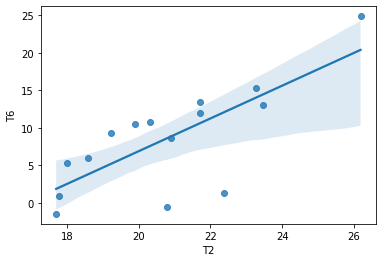

In [29]:
# Visualize the line of best fit with x = T2 and y = T6 using a regression plot.
import seaborn as sns
sns.regplot(x="T2", y="T6", data=simple_linear_reg_df)

##### From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [30]:
# Split T2 and T6 into a training and testing set.
from sklearn.model_selection import train_test_split
x = df[['T2']]
y = df[['T6']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#fit the model to the training dataset.
lm.fit(x_train, y_train)

#obtain predictions.
predicted_values = lm.predict(x_test)

In [32]:
# R-squared value of the linear model of the relationship between T2 and T6.
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.64

##### Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions: What is the Mean Absolute Error (in two decimal places)?

In [33]:
# Normalise given dataset to a common scale using the MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = df.drop(columns = ['date', 'lights'])
normalised_df = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
features_df = normalised_df.drop(columns=['Appliances'])
target = normalised_df['Appliances']

In [34]:
# Split features_df and target into a training and testing set.
x_train1, x_test1, y_train1, y_test1 = train_test_split(features_df, target, test_size=0.3, random_state=42)

In [35]:
# Multiple linear regression model.
lm1 = LinearRegression()

#fit the model to the training dataset.
lm1.fit(x_train1, y_train1)

#obtain predictions.
predicted_values1 = lm1.predict(x_test1)
predicted_values1

array([0.03322172, 0.2441231 , 0.03411224, ..., 0.06838762, 0.10030376,
       0.05729594])

In [36]:
# Mean Absolute Error.
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test1, predicted_values1)
round(mae, 2)

0.05

##### What is the Residual Sum of Squares (in two decimal places)?

In [37]:
# Residual sum of squares.
import numpy as np
rss = np.sum(np.square(y_test1 - predicted_values1))
round(rss, 2)

45.35

##### What is the Root Mean Squared Error (in three decimal places)?



In [38]:
# Root  mean squared error.
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test1, predicted_values1))
round(rmse, 3)

0.088

#### What is the Coefficient of Determination (in two decimal places)?

In [39]:
# Coefficient of Determination or R-Squared.
from sklearn.metrics import r2_score
r2_score = r2_score(y_test1, predicted_values1)
round(r2_score, 2)

0.15

##### Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [40]:
def get_weights_df(model, feat, col_name):
    """ This function returns the weight of every feature """
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [41]:
# Call get_weights_df function for linear model weights.
linear_model_weights = get_weights_df(lm1, x_train1, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,rv2,-1.015533e+11
1,RH_2,-4.566132e-01
2,T_out,-3.217958e-01
3,T2,-2.361240e-01
4,T9,-1.899212e-01
5,RH_8,-1.575959e-01
6,RH_out,-7.765047e-02
7,RH_7,-4.462370e-02
8,RH_9,-3.980111e-02
9,T5,-1.565920e-02


In [42]:
# Lowest weight in linear model.
linear_model_weights['Linear_Model_Weight'].min()

-101553272754.63112

In [43]:
# Highest weight in linear model.
linear_model_weights['Linear_Model_Weight'].max()

101553272754.63245

##### Since we are not considering rv1 and rv2 (both are unimportant variables), we select RH_2 and RH_1 as the minimum and maximum weights.

##### Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [44]:
# Ridge Regression model (penalization).
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train1, y_train1)
predicted_values2 = ridge_reg.predict(x_test1)

In [45]:
# Root mean squared error for Ridge Regression Model.
rmse = np.sqrt(mean_squared_error(y_test1, predicted_values2))
round(rmse, 3)

0.088

##### Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature?

In [46]:
# Lasso Regression model (penalization).
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train1, y_train1)

# Call get_weights_df function for Lasso Regression model weights.
lasso_weights_df = get_weights_df(lasso_reg, x_train1, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [47]:
# Count values are are non-zero and zero.
(lasso_weights_df['Lasso_weight'] != 0).value_counts()

False    22
True      4
Name: Lasso_weight, dtype: int64

##### What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [48]:
# Root mean squared error for Lasso Regression Model.
predicted_values3 = lasso_reg.predict(x_test1)
rmse = np.sqrt(mean_squared_error(y_test1, predicted_values3))
round(rmse, 3)

0.094